In [28]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [29]:
df = pd.read_csv('../data-shared/labels-with-tags-chu.csv')

In [30]:
#select city == chicago
df = df[df['city'] == 'chicago']
df

,city,label_id,label_type,severity,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,global_attribute_id,tag_list,description,lat,lng
344616,chicago,8,CurbRamp,2.0,2,136.687500,-18.625000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,734342.0,points into traffic,NaN,42.083668,-87.980347
344617,chicago,9,CurbRamp,1.0,2,249.937500,-14.125000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,734065.0,NaN,NaN,42.083694,-87.980606
344618,chicago,10,CurbRamp,2.0,3,288.656250,-13.187500,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,NaN,missing tactile warning,NaN,42.083786,-87.980606
344619,chicago,11,CurbRamp,3.0,3,49.245537,-16.220982,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,733678.0,"narrow,points into traffic",NaN,42.083794,-87.980354
344620,chicago,12,CurbRamp,3.0,3,42.636162,-16.033482,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,733921.0,"missing tactile warning,steep",NaN,42.083817,-87.980362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368549,chicago,22167,Occlusion,NaN,3,198.160721,-5.162946,270.809662,0.730950,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953518,-87.730461
368550,chicago,22168,Occlusion,NaN,3,198.160721,-5.162946,270.893951,0.790565,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953514,-87.730324
368551,chicago,22169,Occlusion,NaN,3,198.160721,-5.162946,270.677826,0.706790,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953518,-87.730240
368552,chicago,22170,Occlusion,NaN,3,214.448654,-3.897321,268.717926,0.749344,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953522,-87.730850


In [7]:
#get Nan counts of global attribute id
df['global_attribute_id'].isna().sum()

4590

In [8]:
#turn df into geodataframe
geometry = [Point(xy) for xy in zip(df.lng, df.lat)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

<AxesSubplot: >

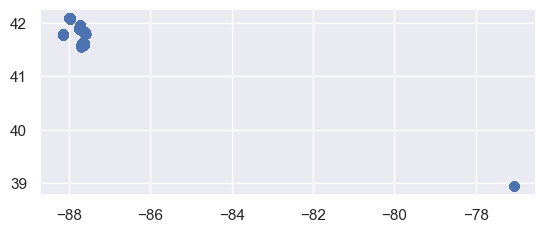

In [9]:
gdf.plot()

In [10]:

#minx, miny, maxx, maxy
minx = -87.58644104  
miny = 41.55007553 
maxx = -88.15451813   
maxy = 42.09182739

chicago = gdf.cx[minx:maxx, miny:maxy]


In [11]:
chicago

,city,label_id,label_type,severity,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,global_attribute_id,tag_list,description,lat,lng,geometry
344616,chicago,8,CurbRamp,2.0,2,136.687500,-18.625000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,734342.0,points into traffic,NaN,42.083668,-87.980347,POINT (-87.98035 42.08367)
344617,chicago,9,CurbRamp,1.0,2,249.937500,-14.125000,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,734065.0,NaN,NaN,42.083694,-87.980606,POINT (-87.98061 42.08369)
344618,chicago,10,CurbRamp,2.0,3,288.656250,-13.187500,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,NaN,missing tactile warning,NaN,42.083786,-87.980606,POINT (-87.98061 42.08379)
344619,chicago,11,CurbRamp,3.0,3,49.245537,-16.220982,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,733678.0,"narrow,points into traffic",NaN,42.083794,-87.980354,POINT (-87.98035 42.08379)
344620,chicago,12,CurbRamp,3.0,3,42.636162,-16.033482,268.225098,-0.562027,3e25ea1d-f762-421a-b98b-3cba36e1bbfb,733921.0,"missing tactile warning,steep",NaN,42.083817,-87.980362,POINT (-87.98036 42.08382)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368549,chicago,22167,Occlusion,NaN,3,198.160721,-5.162946,270.809662,0.730950,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953518,-87.730461,POINT (-87.73046 41.95352)
368550,chicago,22168,Occlusion,NaN,3,198.160721,-5.162946,270.893951,0.790565,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953514,-87.730324,POINT (-87.73032 41.95351)
368551,chicago,22169,Occlusion,NaN,3,198.160721,-5.162946,270.677826,0.706790,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953518,-87.730240,POINT (-87.73024 41.95352)
368552,chicago,22170,Occlusion,NaN,3,214.448654,-3.897321,268.717926,0.749344,325198df-cddc-44ee-a87e-c831c3147aa0,NaN,NaN,NaN,41.953522,-87.730850,POINT (-87.73085 41.95352)


In [13]:
#chicago.explore()

In [14]:
#chicago label id number of unique
chicago['label_id'].nunique()

18897

In [15]:
#select only label id taglist and description 
chicago = chicago[['label_id', 'tag_list', 'description']]

In [16]:
#select tag list that are not nan
chicago_tag = chicago.drop(columns=['description'])
chicago_tag = chicago_tag[chicago_tag['tag_list'].notna()]
# create a new column with the length of the tag list 
chicago_tag['tag_count'] = chicago_tag['tag_list'].str.split(',').str.len()
#drop tag_list column
chicago_tag = chicago_tag.drop(columns=['tag_list'])


In [17]:
#merge with chicago
chicago = chicago.merge(chicago_tag, on='label_id', how='left')

In [18]:
# #turn nan to 0 non nan to 1
chicago['tag_list'] = chicago['tag_list'].notna().astype('int')
chicago['description'] = chicago['description'].notna().astype('int')
#fill nan with 0
chicago = chicago.fillna(0)


In [19]:
#group by label id and max
chicago = chicago.groupby('label_id').max()
#reset index
chicago = chicago.reset_index()

<AxesSubplot: >

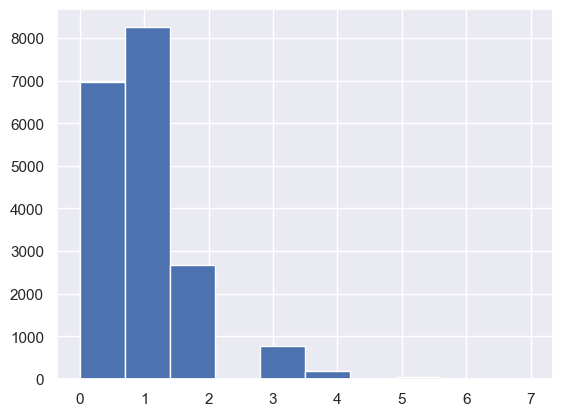

In [20]:
chicago['tag_count'].hist()

In [21]:
chicago

,label_id,tag_list,description,tag_count
0,8,1,0,1.0
1,9,0,0,0.0
2,10,1,0,1.0
3,11,1,0,2.0
4,12,1,0,2.0
...,...,...,...,...
18892,22167,0,0,0.0
18893,22168,0,0,0.0
18894,22169,0,0,0.0
18895,22170,0,0,0.0


In [23]:
#read in chicago
labels = pd.read_csv('data/processed-labels/labels_all_chicago.csv')

In [24]:
#create a new df with only label id from labels
label_ids = labels[['label_id']]
#merge label ids with chicago
chicago = pd.merge(label_ids, chicago, on='label_id', how='left')
#fill nan with 0
chicago = chicago.fillna(0).sort_values(by='label_id').reset_index(drop=True)
chicago

,label_id,tag_list,description,tag_count
0,8,1.0,0.0,1.0
1,9,0.0,0.0,0.0
2,10,1.0,0.0,1.0
3,11,1.0,0.0,2.0
4,12,1.0,0.0,2.0
...,...,...,...,...
18280,21507,1.0,0.0,1.0
18281,21508,1.0,0.0,1.0
18282,21509,0.0,0.0,0.0
18283,21517,0.0,0.0,0.0


In [26]:
#make a folder called features
!mkdir data/features

In [27]:
#export to csv 
chicago.to_csv('data/features/optional_input.csv', index=False)